In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import scipy
import pymc3 as pm

from pymc3.math import exp
from pymc3.distributions.timeseries import GaussianRandomWalk

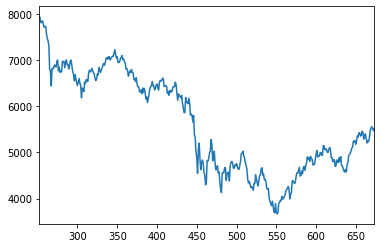

In [9]:
dax = pd.read_csv("dax.csv")
dax_subset = dax.loc[(dax["Date"]>"2008-01-01") & (dax["Date"]<"2009-08-31")]
dax_c = dax_subset["Close"]
dax_c.plot()

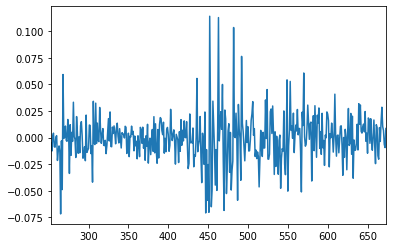

In [10]:
returns = dax_c.pct_change(1)[1:]
returns.plot()

In [11]:
with pm.Model() as sp500_model:
    nu = pm.Exponential('nu', 1./10, testval=5.)
    sigma = pm.Exponential('sigma', 1./.02, testval=.1)
    s = pm.GaussianRandomWalk('s', sigma**-2, shape=len(returns))
    volatility_process = pm.Deterministic('volatility_process', exp(-2*s))
    r = pm.StudentT('r', nu, lam=1/volatility_process, observed=returns)
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, sigma, nu]
Sampling 4 chains: 100%|██████████| 10000/10000 [03:15<00:00, 51.24draws/s]
The acceptance probability does not match the target. It is 0.7143425614109004, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


In [14]:
pm.traceplot(data=trace, var_names=[nu, sigma])

AttributeError: 'TransformedRV' object has no attribute 'startswith'